# imports

In [1]:
from itertools import count
from math import ceil, floor
import cv2
import os
import mediapipe as mp 
import shutil
import datetime
import time #to calculate frame per second 
import numpy as np
import pydot

# Both hands

In [42]:
const_inf = 100

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def med_detect(img,model):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = model.process(img)
    img.flags.writeable = True
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    return img,results

def draw_lms(img, results):
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    
    return img

def extract_key_points(result):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.full(63,const_inf)

    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.full(63,const_inf)
    
    return np.concatenate([lh,rh]) 

def extract_key_points_left(result):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.full(63,const_inf)

    
    return lh

def extract_key_points_right(result):
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.full(63,const_inf)
    
    return rh


def angle_between_vectors(u, v):
        """
        Args
            u, v: 3D vectors representing two connections
        Return
            Angle between the two vectors
        """
        if np.array_equal(u, v):
            return 0
        dot_product = np.dot(u, v)
        norm = np.linalg.norm(u) * np.linalg.norm(v)
        return np.arccos(dot_product / norm)


# path = "F:/captures/4th year thesis/datasets/Sign language/Videos"
path = "C:/Users/Raiyan/Desktop/final/Videos"

# out_path = "F:/captures/4th year thesis/datasets/Sign language/Frames"
out_path = "C:/Users/Raiyan/Desktop/final/Frames"

# point_out = "F:/captures/4th year thesis/datasets/Sign language/point data"
point_out = "C:/Users/Raiyan/Desktop/final/Points"

dir_list = os.listdir(path)

# print(dir_list)

for fol in dir_list:
    # print(fol)
    tem_path = path+"/"+fol
    tem_dir = os.listdir(tem_path)
    # print(tem_dir)
    for vid in tem_dir:
        # print(vid)
        vid_name = vid.split('.')
        child_folder = vid_name[0]
        # print(child_folder)
        
        out_folder = os.path.join(out_path,child_folder)
        
        point_out_folder = os.path.join(point_out,child_folder)
        
        # print(out_folder)
        
        if os.path.exists(out_folder):
            shutil.rmtree(out_folder)
            
        if os.path.exists(point_out_folder):
            shutil.rmtree(point_out_folder)
            
        os.mkdir(point_out_folder)
        
        os.mkdir(out_folder)
        
        vid_path = path+"/"+fol+"/"+vid
        
        # print(vid_path)
        
        cap = cv2.VideoCapture(vid_path)
        
        mpHands = mp.solutions.hands
        hands = mpHands.Hands()
        mpDraw = mp.solutions.drawing_utils
        
        prevTime = 0
        currTime = 0
        
        with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:
            sequence = 0
            long_seq = 1000
            while (cap.isOpened()):
                
                # if cap.isOpened() == False : 
                #     break
                
                ret,frame = cap.read()
                
                if ret:
                
                    img, results = med_detect(frame,holistic)
                    
                    img = draw_lms(img,results)
                    
                    ts = (datetime.datetime.now())
                    
                    ts = str(ts.timestamp())
                    
                    keypoints = extract_key_points(results)
                    
                    l_k = extract_key_points_left(results)
                    
                    r_k = extract_key_points_right(results)
                    
#                     print(len(l_k))
                    
                    ar_l = []
                    
                    p_i = 0
                    
                    while p_i<61:
                        ux = l_k[p_i]
                        uy = l_k[p_i+1]
                        uz = l_k[p_i+2]
                        p_i+=3
                        ar_l.append((ux,uy,uz))
#                         print(p_i)
#                         print("done")
                        
#                     print("done")
                    
#                     print(len(ar_l))
        
#                     print(p_i)

#                     for elm in ar_l:
#                         print(elm)
            
                    
                    ar_r = []
                    
                    p_i = 0
                    
                    while p_i<61:
                        ux = r_k[p_i]
                        uy = r_k[p_i+1]
                        uz = r_k[p_i+2]
                        p_i+=3
                        ar_r.append((ux,uy,uz))
                        
#                     print(len(ar_r))
                    
                        
                    
                    angles_l=[]
                    angles_r=[]
                    angles_list = []
                    
                    for i in range (0,20):
                        connection_from1 = ar_l[i]
                        connection_from2 = ar_r[i]
                        for j in range(i+1,21):
                            connection_to1 = ar_l[j]
                            connection_to2 = ar_r[j]
                            angle1 = angle_between_vectors(connection_from1, connection_to1)
                            # If the angle is not NaN we store it else we store 0
                            if angle1 == angle1:
                                angles_list.append(angle1)
                            else:
                                angles_list.append(0)
#                             print("done")
                            
                            angle2 = angle_between_vectors(connection_from2, connection_to2)
                            # If the angle is not NaN we store it else we store 0
                            if angle2 == angle2:
                                angles_list.append(angle2)
                            else:
                                angles_list.append(0)
#                             print("done")
                    
                    
#                     for i in range (0,20):
#                         connection_from = ar_r[i]
#                         for j in range(i+1,21):
#                             connection_to = ar_r[j]
#                             angle = angle_between_vectors(connection_from, connection_to)
#                             # If the angle is not NaN we store it else we store 0
#                             if angle == angle:
#                                 angles_r.append(angle)
#                             else:
#                                 angles_r.append(0)
# #                             print("done")
                    
                    
#                     angles_list = []
                    
#                     angles_list.append(angles_l)
                    
#                     angles_list.append(angles_r)
                    
#                     print("done")
                    
#                     print(len(angles_l))

#                     print(len(angles_list))
                    
                    
                    if(len(keypoints)==126):
                    
                        # if sequence == 0:
                        #     print(keypoints)

                        np.save(os.path.join(point_out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),angles_list)

                        # sequence = sequence+1
                        # long_seq = long_seq+1

                        sq = str(sequence)

                        cv2. imwrite(os. path. join(out_folder
                                                    , child_folder+'_'+str(long_seq)+"_"+ts+sq+'.jpg'), img)

#                         cv2.imshow('Hand Gestures',img)

                        sequence = sequence+1
                        long_seq = long_seq+1
                    
                    if cv2.waitKey(1)==13 : 
                        break
                
                else:
                    break
            cap.release()
            cv2.destroyAllWindows()
            
print("Done")        

Done


# Interpolation


In [ ]:
# const_inf = 100000000000000

# path = "F:/Online Class/4th year thesis/datasets/Sign language/point data"
# out_path = "F:/Online Class/4th year thesis/datasets/Sign language/interpolated"

# dir_list = os.listdir(path)

# print(dir_list)

# for fol in dir_list:
#     # print(fol)
#     child_folder = fol
#     out_folder = os.path.join(out_path,child_folder)
#     tem_path = path+"/"+fol
#     tem_dir = os.listdir(tem_path)
#     if os.path.exists(out_folder):
#         shutil.rmtree(out_folder)
#     os.mkdir(out_folder)
#     # print(tem_dir)
#     id = 0
#     lst=[]
#     for pnt in tem_dir:
#         # print(pnt)
#         # if pnt == 'shundor_1_1664389748.840814_14.npy':
#         tf=1
#         pnt_str = str(tem_path)
#         point_data_path = pnt_str+"/"+pnt
#         # print(point_data_path)
#         data=np.load(point_data_path)
#         # print("Data start")
#         # print(len(data))
#         # print(data[0])
#         # print(data)
#         # print("Data end")
#         for dt in data:
#             # print("St")
#             # print(dt)
#             # print("End")
#             if dt == const_inf:
#                 # print(dt)
#                 tf=0
#         if tf==1:
#             lst.append(id)
#         id=id+1
#     # print(fol)
#     # print(lst)
#     sequence = 0
#     long_seq=1000
#     expected_sq = 0
#     msd_lst = []
#     for pnt in tem_dir:
#         # print(pnt)
#         # if pnt == 'shundor_1_1664389748.840814_14.npy':
#         tf=1
#         pnt_str = str(tem_path)
#         point_data_path = pnt_str+"/"+pnt
#         # print(point_data_path)
#         data=np.load(point_data_path)
#         # print("Data start")
#         # print(len(data))
#         # print(data[0])
#         # print(data)
#         # print("Data end"
        
#         ext = 0
        
#         for item in lst:
#             if item==expected_sq:
#                 ext=1
        
#         ts = (datetime.datetime.now())
                    
#         ts = str(ts.timestamp())
        
#         if ext==1:
        
#             np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),data)
            
#         if ext == 0:
#             msd_lst.append(expected_sq)
#             prev = -1
#             nxt = -1
#             x = len(lst)
#             for i in range(0,x-1):
#                 if expected_sq > lst[i] and expected_sq < lst[i+1]:
#                     prev = lst[i]
#                     nxt = lst[i+1]
#             # if nxt!=prev:
#             factor = (expected_sq-prev) / (nxt-prev)
            
#             pr_ar = np.full(126,const_inf)
            
#             nx_ar = np.full(126,const_inf)
            
#             for ld in tem_dir:
#                 # print(ld)
                
#                 splt_txt = ld.split("_")
                
#                 # print(splt_txt)
                
                
#                 # if pnt == 'shundor_1_1664389748.840814_14.npy':
#                 ld_str = str(tem_path)
#                 # print("EIJE")
#                 point_data_path_2 = ld_str+"/"+ld
#                 # print(point_data_path_2)
            
#                 data=np.load(point_data_path_2)
                
#                 # print("Start")
#                 # print(data[0])
#                 # print("End")
                
#                 # print(data)
                
#                 final_split = splt_txt[4].split(".")
                
#                 # print(type(final_split[0]))
                
#                 num = int(final_split[0])
                
#                 if num == prev:
#                     # print(prev)
#                     pr_ar = data
#                 if num == nxt:
#                     nx_ar = data
#                     # print(nxt)
                    
#             cur_ar = data
            
            
            
#             for i in range(0,126):
                
#                 cur_ar[i] = factor*(nx_ar[i]-pr_ar[i])
#                 # print(factor*(nx_ar[i]-pr_ar[i]))
#             data = cur_ar
            
#             # print("Start")
#             # print(cur_ar[0])
#             # print("End")
#             # print(cur_ar)
#             np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),cur_ar)
            
            
#             # print("Expexted: ", expected_sq)
#             # print("Pre ",prev,' ','next ', nxt)
            
            
        
#         # print(msd_lst)
        
#         long_seq = long_seq+1
        
#         sequence = sequence+1
        
#         expected_sq = expected_sq+1

In [ ]:
print("Done")

# Fixed


In [ ]:
# const_inf = 100000000000000

# path = "F:/Online Class/4th year thesis/datasets/Sign language/interpolated"
# out_path = "F:/Online Class/4th year thesis/datasets/Sign language/fixed"

# dir_list = os.listdir(path)

# print(dir_list)



# for fol in dir_list:
#     # print(fol)
#     child_folder = fol
#     out_folder = os.path.join(out_path,child_folder)
#     tem_path = path+"/"+fol
#     tem_dir = os.listdir(tem_path)
#     if os.path.exists(out_folder):
#         shutil.rmtree(out_folder)
#     os.mkdir(out_folder)
#     # print(tem_dir)
    
#     count = 0
#     for pnt in tem_dir:
#         count = count+1
#     count = count/50
#     print(count)
    
#     id = count
#     sequence = 0
#     long_seq=1000
#     for iii in range(0,48):
#         # print(tem_dir[0])
        
#         ts = (datetime.datetime.now())
                    
#         ts = str(ts.timestamp())
        
#         if id<=1:
#             # print()
#             point_data_path = tem_path+"/"+tem_dir[0]
#             data=np.load(point_data_path)
#             np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),data)
#             print(data)
            
#         else:
#             flr = floor(id)
#             cl = ceil(id)
            
#             if flr==cl:
            
#                 print("ST")
                
#                 print(flr)
                
#                 print(cl)
                
#                 print("EN")
                
#                 point_data_path = tem_path+"/"+tem_dir[cl]
#                 data=np.load(point_data_path)
#                 np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),data)
#                 print(data)
            
#             else:
#                 factor = (id-flr)/(cl-flr)
                
#                 point_data_path = tem_path+"/"+tem_dir[flr]
#                 data1=np.load(point_data_path)
                
#                 point_data_path = tem_path+"/"+tem_dir[cl]
#                 data2=np.load(point_data_path)
                
#                 data = data1
                
#                 for i in range(0,126):
#                     data[i] = factor*(data2[i]-data1[i])
#                 np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),data)
                
#                 print(data)
            
        
        
        
#         sequence = sequence+1
#         long_seq = long_seq+1
#         id=id+count

In [ ]:
print("Done")

# Label and feature

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
def plot_history(history):
    
    fig, axs = plt.subplots(2)
    
    axs[0].plot( history.history["categorical_accuracy"], label="train accuracy")
    axs[0].plot( history.history["val_categorical_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    axs[1].plot( history.history["loss"], label="train error")
    axs[1].plot( history.history["val_loss"], label="validation error")
    axs[1].set_ylabel("Error")
#     axs[1].set_ylabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
    
    

In [4]:
actions = np.array(['angti',
                    'bari',
                    'bijoy',
                    'biman',
                    'biscuit',
                    'bondhu',
                    'camera',
                    'chosma',
                    'durgondho',
                    'girja',
                    'goru',
                    'kalo',
                    'kharap',
                    'khata',
                    'kripon',
                    'kuli',
                    'mach',
                    'mangsho',
                    'naam',
                    'pakhi',
                    'pani', 
                    'rasta',
                    'sheit',
                    'shikkhok',
                    'sundor',
                    'telephone',
                    'valo'
                    ])

In [5]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'angti': 0,
 'bari': 1,
 'bijoy': 2,
 'biman': 3,
 'biscuit': 4,
 'bondhu': 5,
 'camera': 6,
 'chosma': 7,
 'durgondho': 8,
 'girja': 9,
 'goru': 10,
 'kalo': 11,
 'kharap': 12,
 'khata': 13,
 'kripon': 14,
 'kuli': 15,
 'mach': 16,
 'mangsho': 17,
 'naam': 18,
 'pakhi': 19,
 'pani': 20,
 'rasta': 21,
 'sheit': 22,
 'shikkhok': 23,
 'sundor': 24,
 'telephone': 25,
 'valo': 26}

In [6]:
# Thirty videos worth of data
# HOW MANY VIDEO FOR EACH ACTION ?????

no_sequences = 42
# HOW MANY FRAME WE TAKE FOR EACH VIDEO ?????
# Videos are going to be 30 frames in length
sequence_length = 10

# Folder start
# start_folder = 30

DATA_PATH = os.path.join('C:/Users/Raiyan/Desktop/final/training')
ii = 0
sequences = [] 
labels = []
for action in actions:
#     no_sequences = 8
#     if(action == "angti"):
#         no_sequences=6
#     elif(action == "chosma"):
#         no_sequences=6
#     elif(action == "kripon"):
#         no_sequences=7
#     elif(action == "kuli"):
#         no_sequences=5 
#     elif(action == "mach"):
#         no_sequences=5
#     elif(action == "mangsho"):
#         no_sequences=6
#     elif(action == "pakhi"):
#         no_sequences=6
#     elif(action == "valo"):
#         no_sequences=5  
    
#     print(action)
#     print(no_sequences)
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            
            # res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # res = np.load(os.path.join( f'/content/drive/MyDrive/thesis/ip_data2/{action}/{str(sequence)}/{sequence_length}.npy'.format(frame_num)))
            # loaded_path = os.path.join( f'/content/drive/MyDrive/thesis/ip_data2/{action}/{str(sequence)}/{frame_num}.npy')

            loaded_path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            # print(frame_num)
            # print(loaded_path, frame_num)
            # print( np.array(np.load( loaded_path )).shape ) # gives (126,)
            res = np.load( loaded_path )
            # print(res)
            window.append(res)
            # print( np.array(window).shape )
        print( "." , end="") if np.array(window).shape == (10,420) else print( ii, 'bhul->', action, sequence, 'e', np.array(window).shape,'ashche')
        # print(sequence)
        ii = ii + 1
        sequences.append(window)
        labels.append(label_map[action])
        
    

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [10]:
# BAAAAAAAAAAAAAAAAAAAAd
# Thirty videos worth of data
# HOW MANY VIDEO FOR EACH ACTION ?????
no_sequences = 80

# HOW MANY FRAME WE TAKE FOR EACH VIDEO ?????
# Videos are going to be 30 frames in length
sequence_length = 10

# Folder start
# start_folder = 30

DATA_PATH = os.path.join('C:/Users/Raiyan/Desktop/training')
ii = 0
sequences = [] 
labels = []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            
            # res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # res = np.load(os.path.join( f'/content/drive/MyDrive/thesis/ip_data2/{action}/{str(sequence)}/{sequence_length}.npy'.format(frame_num)))
            # loaded_path = os.path.join( f'/content/drive/MyDrive/thesis/ip_data2/{action}/{str(sequence)}/{frame_num}.npy')

            loaded_path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            # print(frame_num)
            # print(loaded_path, frame_num)
            # print( np.array(np.load( loaded_path )).shape ) # gives (126,)
            res = np.load( loaded_path )
            # print(res)
            window.append(res)
            # print( np.array(window).shape )
        print( ii, np.array(window).shape ) if np.array(window).shape == (10,126) else print( ii, 'bhul->', action, sequence, 'e', np.array(window).shape,'ashche')
        # print(sequence)
        ii = ii + 1
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Raiyan/Desktop/training\\angti\\0\\0.npy'

In [7]:
print(np.array(sequences).shape) # 90 ta item each having 10 vals
# print(np.array(labels).shape) # 90 ta item each having 10 vals
print(sequences[0:1])

(1134, 10, 420)
[[array([0.04050874, 0.03768441, 0.07692064, 0.07981049, 0.10562124,
       0.10573193, 0.12903768, 0.12190472, 0.05117713, 0.07952429,
       0.06252935, 0.12548012, 0.06789224, 0.14878921, 0.07103122,
       0.16082852, 0.03472238, 0.06104976, 0.04888085, 0.11130811,
       0.05498294, 0.11691409, 0.05884423, 0.11011118, 0.04271654,
       0.05111019, 0.05847993, 0.08393623, 0.06437585, 0.08776693,
       0.06696705, 0.08343867, 0.06019911, 0.04920856, 0.07256989,
       0.06304   , 0.07654785, 0.06623662, 0.0786931 , 0.06349082,
       0.03649727, 0.04223679, 0.06525438, 0.06824535, 0.08882819,
       0.08457208, 0.02609383, 0.0486183 , 0.04071819, 0.09125515,
       0.04726896, 0.11373571, 0.05071077, 0.12533446, 0.0443723 ,
       0.04224987, 0.05761775, 0.07924418, 0.06173466, 0.08350552,
       0.06387256, 0.07666374, 0.07072682, 0.04781798, 0.08522292,
       0.05687695, 0.0900411 , 0.05554736, 0.09171568, 0.04927115,
       0.09350687, 0.05740335, 0.1045622 , 0

In [7]:
# np.array(sequences).shape gives => (a, b, c) 
# meaning... total 'a' videos, 'b' frames each and each one having 'c' keypoints

print(np.array(sequences).shape) 


print(np.array(labels).shape)
X = np.array(sequences)
y = to_categorical(labels).astype( np.float32 )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_test.shape)
print(y_test.shape)
# actions[np.argmax(y_test[4])]

(1134, 10, 420)
(1134,)
(227, 10, 420)
(227, 27)


In [11]:
fnd=X_test[0]
idx=0
for a in X:
    if(a.all()==fnd.all()):
        print(idx)
    idx+=1

0
1
2
3
4
6
7
8
10
11
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
34
35
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
55
56
57
58
59
60
61
62
63
64
65
67
68
69
70
71
72
73
74
75
76
77
78
79
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
171
172
174
175
176
177
178
180
181
184
189
190
191
192
193
194
195
196
197
198
199
200
201
202
204
205
206
208
209
211
212
213
214
222
226
227
228
229
230
232
233
234
238
241
242
243
245
246
247
248
249
250
251
252
253
255
256
257
258
259
260
261
264
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
316
317
319
320
321
322
323
324
325
326
327
328
329
330


# LSTM Model

In [8]:
# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.callbacks import TensorBoard

# input shape = X.shape er last 2 ta value
# input_shape=( how many frames per prediction ?? , how many features ?? )

model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(10,420)))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [59]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# es = EarlyStopping(monitor='val_categorical_accuracy', mode='min', verbose=1)

In [60]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100)

Epoch 1/100
19/19 [==============================] - 3s 36ms/step - loss: 3.2786 - categorical_accuracy: 0.0445 - val_loss: 3.1957 - val_categorical_accuracy: 0.0600
Epoch 2/100
19/19 [==============================] - 0s 16ms/step - loss: 2.9391 - categorical_accuracy: 0.1417 - val_loss: 2.7151 - val_categorical_accuracy: 0.1400
Epoch 3/100
19/19 [==============================] - 0s 16ms/step - loss: 2.5836 - categorical_accuracy: 0.2175 - val_loss: 2.4731 - val_categorical_accuracy: 0.2100
Epoch 4/100
19/19 [==============================] - 0s 16ms/step - loss: 2.1995 - categorical_accuracy: 0.2900 - val_loss: 2.2702 - val_categorical_accuracy: 0.2800
Epoch 5/100
19/19 [==============================] - 0s 16ms/step - loss: 2.4190 - categorical_accuracy: 0.2554 - val_loss: 2.3501 - val_categorical_accuracy: 0.2733
Epoch 6/100
19/19 [==============================] - 0s 16ms/step - loss: 1.9219 - categorical_accuracy: 0.3690 - val_loss: 1.8061 - val_categorical_accuracy: 0.4300
Epoc

19/19 [==============================] - 0s 16ms/step - loss: 0.1716 - categorical_accuracy: 0.9555 - val_loss: 0.5542 - val_categorical_accuracy: 0.9167
Epoch 100/100
19/19 [==============================] - 0s 17ms/step - loss: 0.1040 - categorical_accuracy: 0.9703 - val_loss: 0.4692 - val_categorical_accuracy: 0.9333


In [61]:
# model.summary()
# model.save("signModel_bn88_1"+ts+".h5")

In [62]:
from keras.utils.vis_utils import plot_model

# plot_model(model, to_file='model_plot.png', dpi = 300, show_shapes=True, show_layer_names=True)

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


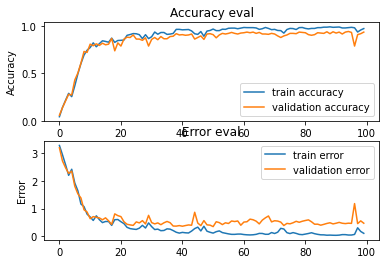

In [63]:
# print(history.params)
# print(model.metrics_names)
print(history.history.keys())
# print(history.history.values())
plot_history(history)


In [15]:
res = model.predict(X_test)

8/8 [==============================] - 0s 6ms/step


In [16]:
cnt=0
for indx in range(0,111):
    x=(actions[np.argmax(y_test[indx])])
    y=(actions[np.argmax(res[indx])])
    if(x!=y):
        print("does not match->",x,"&",y)
        cnt=cnt+1
print(cnt)

does not match-> mangsho & durgondho
does not match-> camera & shikkhok
does not match-> khata & bondhu
does not match-> kripon & camera
does not match-> khata & bondhu
5


In [17]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

ypred = res

# converts the predictins from their one hot repr to categorical label
ytrue = np.argmax(y_test, axis=1).tolist()
ypred = np.argmax(ypred, axis=1).tolist()
# print(res) 

accuracy_score(ytrue, ypred)

# _, train_acc = model.evaluate(X_train, y_train, verbose=0)
# _, test_acc = model.evaluate(X_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

0.920704845814978

In [63]:
# multilabel_confusion_matrix(ytrue, ypred)

In [68]:
# accuracy_score(ytrue, ypred)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytrue,ypred)
# cm

<AxesSubplot:>

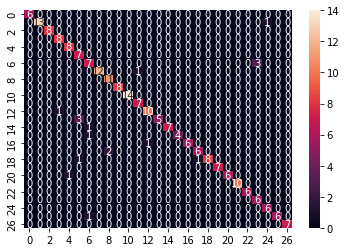

In [19]:
import seaborn as sns
sns.heatmap(cm,annot=True)

# sns.set_xlabel('X-Axis', fontsize=10)

In [67]:
ts = (datetime.datetime.now())
                    
ts = str(ts.timestamp())
model
model.save("signModel_bn92_2"+ts+".h5")
# del model

In [9]:
# model.load_weights('signModel_accu_95.89_all_class_64_ws21675286358.414752.h5')
model.load_weights('signModel_bn92_21675533895.916678.h5')

In [10]:


from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ypred = model.predict(X_test)
res = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
ypred = np.argmax(ypred, axis=1).tolist()


accuracy = accuracy_score(ytrue, ypred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# # calculate the confusion matrix
# conf_mat = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix: \n", conf_mat)

# calculate the classification report
class_rep = classification_report(ytrue, ypred,digits=4)
print("Classification Report: \n", class_rep)

8/8 [==============================] - 0s 5ms/step
Accuracy: 92.07%
Classification Report: 
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         6
           1     1.0000    0.9286    0.9630        14
           2     1.0000    1.0000    1.0000         8
           3     0.8889    1.0000    0.9412         8
           4     0.8889    1.0000    0.9412         8
           5     0.6364    1.0000    0.7778         7
           6     0.7000    0.7000    0.7000        10
           7     1.0000    0.9231    0.9600        13
           8     0.8462    1.0000    0.9167        11
           9     1.0000    1.0000    1.0000         8
          10     1.0000    1.0000    1.0000        14
          11     0.8750    1.0000    0.9333         7
          12     0.9091    0.9091    0.9091        11
          13     1.0000    0.6250    0.7692         8
          14     1.0000    0.8750    0.9333         8
          15     1.0000    0.8000    0.888

In [11]:
# demonstration of calculating metrics for a neural network model using sklearn
# from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# from sklearn.metrics import cohen_kappa_score
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix
# from keras.models import Sequential
# from keras.layers import Dense


print("Precision Score : ", precision_score(ytrue, ypred, pos_label='positive', average='weighted'))
print("Recall Score : ", recall_score(ytrue, ypred, pos_label='positive', average='weighted'))
print("f1 Score : ", f1_score(ytrue, ypred, pos_label='positive', average='weighted'))

accuracy = accuracy_score(ytrue, ypred)
print('Accuracy: %f' % accuracy)

# # precision tp / (tp + fp)
# precision = precision_score(ytrue, ypred)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(ytrue, ypred)
# print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(ytrue, ypred)
# print('F1 score: %f' % f1)

Precision Score :  0.9344029074205286
Recall Score :  0.920704845814978
f1 Score :  0.9214023753256715
Accuracy: 0.920705


C:\Zephyrrus\installed\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Zephyrrus\installed\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Zephyrrus\installed\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


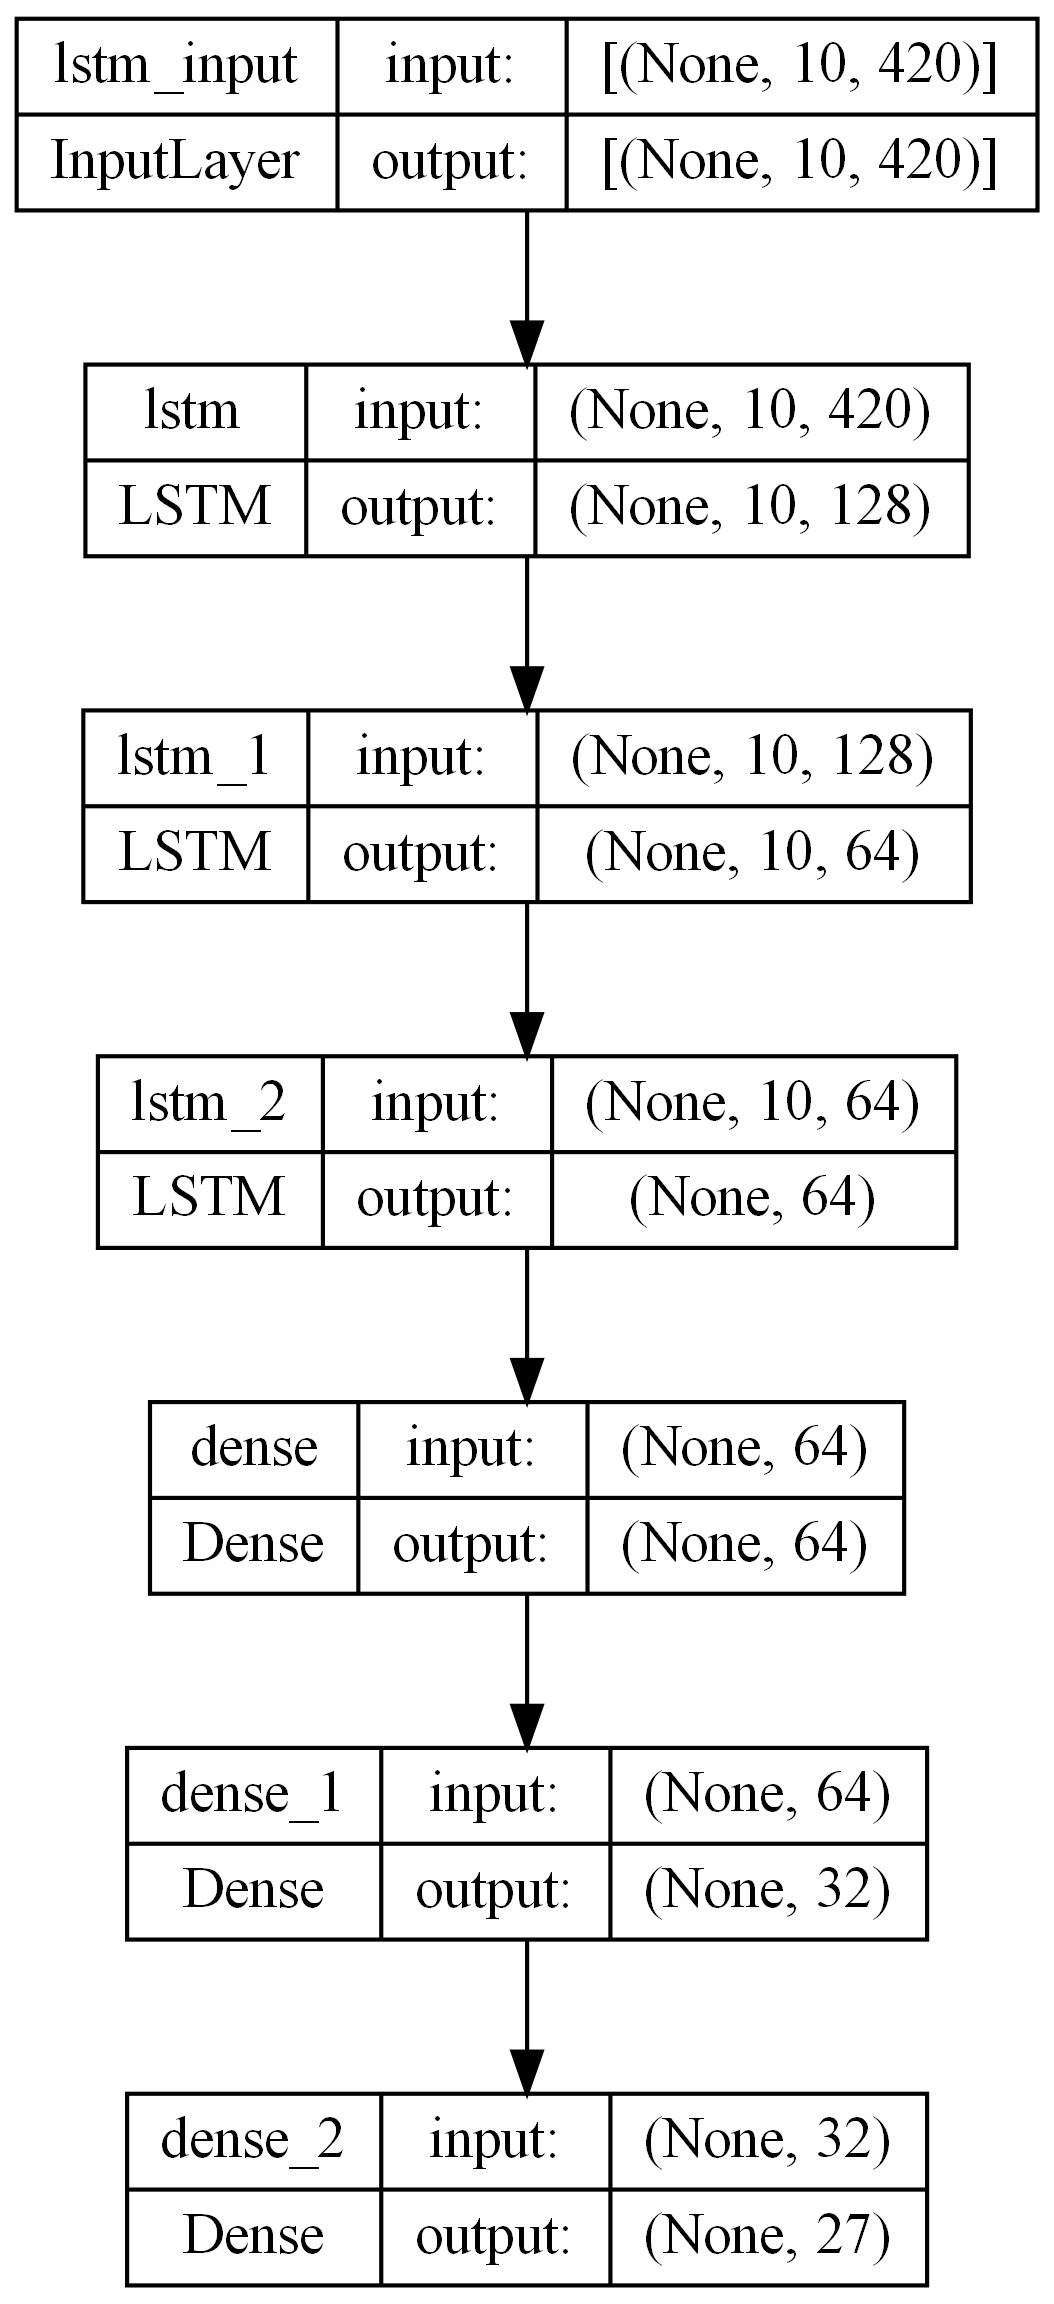

In [11]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', dpi = 300, show_shapes=True, show_layer_names=True)

In [31]:
#conf matrix
from sklearn.metrics import confusion_matrix
import numpy as np
cm = confusion_matrix(ytrue,ypred)
arr=np.zeros(np.float32,(27,27))
arr=cm
print(cm)
for i in range(27):
    sp=0
    if(i==0):
        sp=6
    if(i==1):
        sp=4
    if(i==2):
        sp=8
    if(i==3):
        sp=8
    if(i==4):
        sp=8
    if(i==5):
        sp=7
    if(i==6):
        sp=10
    if(i==7):
        sp=13
    if(i==8):
        sp=11
    if(i==9):
        sp=8
    if(i==10):
        sp=14
    if(i==11):
        sp=7
    if(i==12):
        sp=11
    if(i==13):
        sp=8
    if(i==14):
        sp=8
    if(i==15):
        sp=5
    if(i==16):
        sp=7
    if(i==17):
        sp=8
    if(i==8):
        sp=10
    if(i==19):
        sp=7
    if(i==20):
        sp=7
    if(i==21):
        sp=10
    if(i==22):
        sp=6
    if(i==23):
        sp=6
    if(i==24):
        sp=6
    if(i==25):
        sp=7
    if(i==26):
        sp=7
    for j in range(27):
        arr[i][j]/=sp
    
print(arr)
    
import seaborn as sns
# sns.heatmap(cm,annot=True, normalize=True)

TypeError: expected sequence object with len >= 0 or a single integer

In [18]:
def class_matric(confusion_matrix, class_id):
    """
    confusion matrix of multi-class classification
    
    class_id: id of a particular class 
    
    """
    confusion_matrix = np.float64(confusion_matrix)
    TP = confusion_matrix[class_id,class_id]
    FN = np.sum(confusion_matrix[class_id]) - TP
    FP = np.sum(confusion_matrix[:,class_id]) - TP
    TN = np.sum(confusion_matrix) - TP - FN - FP
    
    # sensitivity = 0 if TP == 0
    if TP != 0:
        sensitivity = TP/(TP+FN)
    else:
        sensitivity = 0.
    
    specificity = TN/(TN+FP)
    accuracy = (TP+TN)/(TP+FP+FN+TN)
    
    return accuracy
for i in range(27):
    print( i,"->",class_matric(cm, i))

0 -> 1.0
1 -> 0.9955947136563876
2 -> 1.0
3 -> 0.9955947136563876
4 -> 0.9955947136563876
5 -> 0.9823788546255506
6 -> 0.973568281938326
7 -> 0.9955947136563876
8 -> 0.9911894273127754
9 -> 1.0
10 -> 1.0
11 -> 0.9955947136563876
12 -> 0.9911894273127754
13 -> 0.986784140969163
14 -> 0.9955947136563876
15 -> 0.9955947136563876
16 -> 0.9955947136563876
17 -> 0.986784140969163
18 -> 0.9911894273127754
19 -> 1.0
20 -> 0.9955947136563876
21 -> 1.0
22 -> 1.0
23 -> 0.986784140969163
24 -> 0.9955947136563876
25 -> 0.9955947136563876
26 -> 1.0


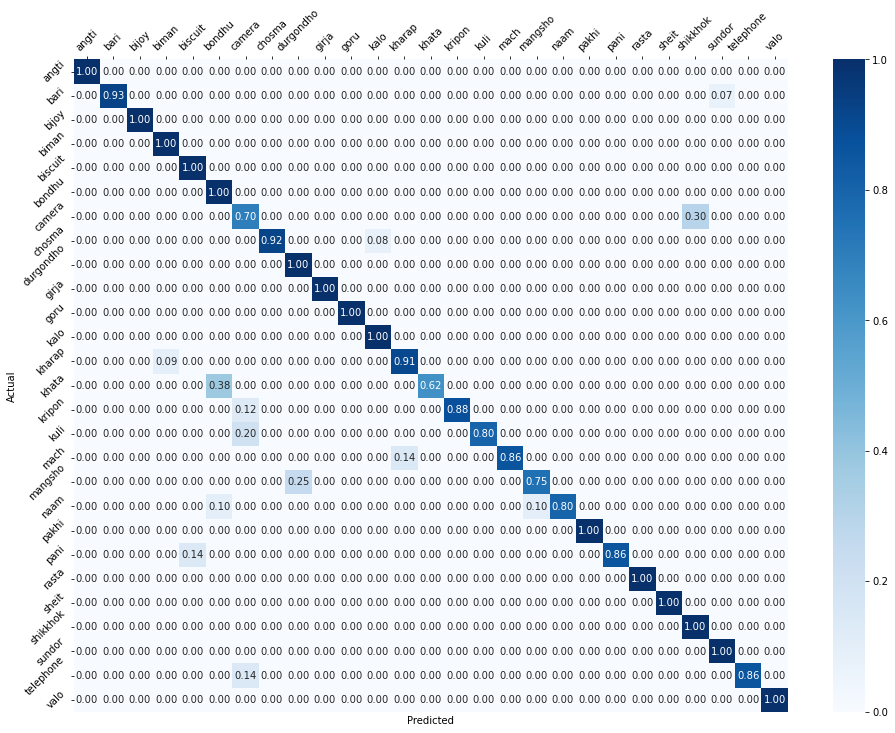

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(ytrue,ypred)

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(4*4,3*4))
sns.heatmap(cmn, annot=True, fmt='.2f', cbar=True, cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.xaxis.set_ticklabels(['angti',
                    'bari',
                    'bijoy',
                    'biman',
                    'biscuit',
                    'bondhu',
                    'camera',
                    'chosma',
                    'durgondho',
                    'girja',
                    'goru',
                    'kalo',
                    'kharap',
                    'khata',
                    'kripon',
                    'kuli',
                    'mach',
                    'mangsho',
                    'naam',
                    'pakhi',
                    'pani', 
                    'rasta',
                    'sheit',
                    'shikkhok',
                    'sundor',
                    'telephone',
                    'valo'
                    ], rotation=45)
ax.yaxis.set_ticklabels(['angti',
                    'bari',
                    'bijoy',
                    'biman',
                    'biscuit',
                    'bondhu',
                    'camera',
                    'chosma',
                    'durgondho',
                    'girja',
                    'goru',
                    'kalo',
                    'kharap',
                    'khata',
                    'kripon',
                    'kuli',
                    'mach',
                    'mangsho',
                    'naam',
                    'pakhi',
                    'pani', 
                    'rasta',
                    'sheit',
                    'shikkhok',
                    'sundor',
                    'telephone',
                    'valo'
                    ], rotation=45)
ax.xaxis.tick_top()
plt.savefig('cm_.png')
plt.show(block=False)


[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.92857143 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.07142857 0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.    

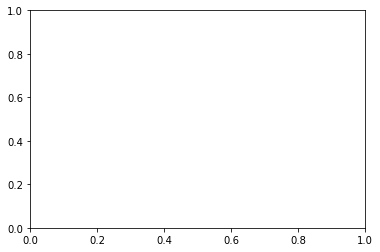

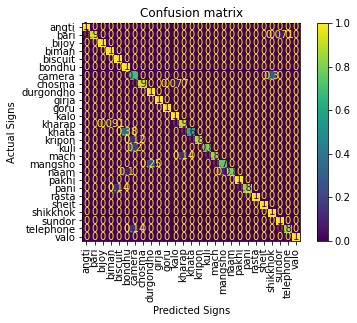

In [25]:
import matplotlib.pyplot as plt
## The scikit-learn Library (aka sklearn) provides simple and efficient
## tools for predictive data analysis.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
## For Simplicity, we start from the data that was already generated
## by the Classifier Model.
## The list 'actual_data' represents the actual(real) outputs

    
## Create the Confusion Matrix out of the Actual and Predicted Data.

## Print the Confusion Matrix.
print(cmn)
fig, ax = plt.subplots()
## Create the Confusion Matrix Display Object(cmd_obj). Note the 
## alphabetical sorting order of the labels.
cmd_obj = ConfusionMatrixDisplay(cmn, display_labels=['angti',
                    'bari',
                    'bijoy',
                    'biman',
                    'biscuit',
                    'bondhu',
                    'camera',
                    'chosma',
                    'durgondho',
                    'girja',
                    'goru',
                    'kalo',
                    'kharap',
                    'khata',
                    'kripon',
                    'kuli',
                    'mach',
                    'mangsho',
                    'naam',
                    'pakhi',
                    'pani', 
                    'rasta',
                    'sheit',
                    'shikkhok',
                    'sundor',
                    'telephone',
                    'valo'
                    ])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
cmd_obj.plot(xticks_rotation = 'vertical')
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Confusion matrix', 
                xlabel='Predicted Signs', 
                ylabel='Actual Signs')
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.

# fig.savefig('bdsn.svg', format='svg', dpi=1200)
plt.show()

In [22]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [23]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'image' is not defined

<Figure size 1296x1296 with 0 Axes>

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
# sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [14]:
# 1. New detection variables custom video
const_inf = 100
 
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def med_detect(img,model):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = model.process(img)
    img.flags.writeable = True
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    return img,results

def draw_lms(img, results):
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    
    return img

def extract_key_points(result):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.full(63,const_inf)

    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.full(63,const_inf)
    
    return np.concatenate([lh,rh]) 

def extract_key_points_left(result):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.full(63,const_inf)

    
    return lh

def extract_key_points_right(result):
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.full(63,const_inf)
    
    return rh


def angle_between_vectors(u, v):
        """
        Args
            u, v: 3D vectors representing two connections
        Return
            Angle between the two vectors
        """
        if np.array_equal(u, v):
            return 0
        dot_product = np.dot(u, v)
        norm = np.linalg.norm(u) * np.linalg.norm(v)
        return np.arccos(dot_product / norm)
sequence = []
sentence = []
threshold = 0.8
ress =""

# cap = cv2.VideoCapture(0)
vid_path="C:/Users/Raiyan/Desktop/tests/kalo.mp4"

cap = cv2.VideoCapture(vid_path)
mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils
# Set mediapipe modelchkdsk /f c: 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while (cap.isOpened()):

        # Read feed
        
        ret, frame = cap.read()

        if ret:
            # Make detections
            image, results = med_detect(frame,holistic)
            print(results)
#             cv2.imshow('OpenCV Feed', image)

            # Draw landmarks
            draw_lms(image, results)

            # 2. Prediction logic
            keypoints = extract_key_points(results)

            l_k = extract_key_points_left(results)

            r_k = extract_key_points_right(results)

    #                   print(len(l_k))

            ar_l = []

            p_i = 0

            while p_i<61:
                ux = l_k[p_i]
                uy = l_k[p_i+1]
                uz = l_k[p_i+2]
                p_i+=3
                ar_l.append((ux,uy,uz))            
    #                         print(p_i)
    #                         print("done")

    #                     print("done")

    #                     print(len(ar_l))

    #                     print(p_i)

    #                     for elm in ar_l:
    #                         print(elm)


            ar_r = []

            p_i = 0

            while p_i<61:
                ux = r_k[p_i]
                uy = r_k[p_i+1]
                uz = r_k[p_i+2]
                p_i+=3
                ar_r.append((ux,uy,uz))

    #                     print(len(ar_r))



            angles_l=[]
            angles_r=[]
            angles_list = []

            for i in range (0,20):
                connection_from1 = ar_l[i]
                connection_from2 = ar_r[i]
                for j in range(i+1,21):
                    connection_to1 = ar_l[j]
                    connection_to2 = ar_r[j]
                    angle1 = angle_between_vectors(connection_from1, connection_to1)
                    # If the angle is not NaN we store it else we store 0
                    if angle1 == angle1:
                        angles_list.append(angle1)
                    else:
                        angles_list.append(0)
    #                             print("done")

                    angle2 = angle_between_vectors(connection_from2, connection_to2)
                    # If the angle is not NaN we store it else we store 0
                    if angle2 == angle2:
                        angles_list.append(angle2)
                    else:
                        angles_list.append(0)
    #         print(len(angles_list))
    #         sequence.insert(0,angles_list)
    #         sequence = sequence[:30]
            sequence.append(angles_list)
            sequence = sequence[-10:]

            if len(sequence) == 10:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                ress = actions[np.argmax(res)]
                print(ress) ###################################


    #         #3. Viz logic
    #             if res[np.argmax(res)] > threshold: 
    #                 if len(sentence) > 0: 
    #                     if actions[np.argmax(res)] != sentence[-1]:
    #                         sentence.append(actions[np.argmax(res)])
    #                 else:
    #                     sentence.append(actions[np.argmax(res)])

    #             if len(sentence) > 5: 
    #                 sentence = sentence[-5:]

    #             # Viz probabilities
    #             image = prob_viz(res, actions, image, colors)

            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(ress), (3,30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow('OpenCV Feed', image)
            
            if cv2.waitKey(1)==13 : 
                        break

            # Show to screen
#             cv2.imshow('OpenCV Feed', image)

            # Break gracefully
        else:
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
biscuit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
durgondho
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
durgondho
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
durgondho
<class 'media

In [34]:
cap.release()
cv2.destroyAllWindows()

In [12]:
X_test[0].shape
np.expand_dims(X_test[0], axis=0).shape

(1, 10, 420)

In [37]:
# 1. New detection variables real time
const_inf = 100
 
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def med_detect(img,model):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = model.process(img)
    img.flags.writeable = True
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    return img,results

def draw_lms(img, results):
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    
    return img

def extract_key_points(result):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.full(63,const_inf)

    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.full(63,const_inf)
    
    return np.concatenate([lh,rh]) 

def extract_key_points_left(result):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.full(63,const_inf)

    
    return lh

def extract_key_points_right(result):
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.full(63,const_inf)
    
    return rh


def angle_between_vectors(u, v):
        """
        Args
            u, v: 3D vectors representing two connections
        Return
            Angle between the two vectors
        """
        if np.array_equal(u, v):
            return 0
        dot_product = np.dot(u, v)
        norm = np.linalg.norm(u) * np.linalg.norm(v)
        return np.arccos(dot_product / norm)
sequence = []
sentence = []
threshold = 0.8
ress =""

cap = cv2.VideoCapture(0)
# vid_path="C:/Users/Raiyan/Desktop/kripon_7.mp4"
# cap = cv2.VideoCapture(vid_path)
mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils
# Set mediapipe modelchkdsk /f c: 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while (cap.isOpened()):

        # Read feed
        
            ret, frame = cap.read()

        
            # Make detections
            image, results = med_detect(frame,holistic)
            print(results)

            # Draw landmarks
            draw_lms(image, results)

            # 2. Prediction logic
            keypoints = extract_key_points(results)

            l_k = extract_key_points_left(results)

            r_k = extract_key_points_right(results)

    #                   print(len(l_k))

            ar_l = []

            p_i = 0

            while p_i<61:
                ux = l_k[p_i]
                uy = l_k[p_i+1]
                uz = l_k[p_i+2]
                p_i+=3
                ar_l.append((ux,uy,uz))            
    #                         print(p_i)
    #                         print("done")

    #                     print("done")

    #                     print(len(ar_l))

    #                     print(p_i)

    #                     for elm in ar_l:
    #                         print(elm)


            ar_r = []

            p_i = 0

            while p_i<61:
                ux = r_k[p_i]
                uy = r_k[p_i+1]
                uz = r_k[p_i+2]
                p_i+=3
                ar_r.append((ux,uy,uz))

    #                     print(len(ar_r))



            angles_l=[]
            angles_r=[]
            angles_list = []

            for i in range (0,20):
                connection_from1 = ar_l[i]
                connection_from2 = ar_r[i]
                for j in range(i+1,21):
                    connection_to1 = ar_l[j]
                    connection_to2 = ar_r[j]
                    angle1 = angle_between_vectors(connection_from1, connection_to1)
                    # If the angle is not NaN we store it else we store 0
                    if angle1 == angle1:
                        angles_list.append(angle1)
                    else:
                        angles_list.append(0)
    #                             print("done")

                    angle2 = angle_between_vectors(connection_from2, connection_to2)
                    # If the angle is not NaN we store it else we store 0
                    if angle2 == angle2:
                        angles_list.append(angle2)
                    else:
                        angles_list.append(0)
    #         print(len(angles_list))
    #         sequence.insert(0,angles_list)
    #         sequence = sequence[:30]
            sequence.append(angles_list)
            sequence = sequence[-10:]

            if len(sequence) == 10:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                ress = actions[np.argmax(res)]
                print(ress) ###################################


    #         #3. Viz logic
    #             if res[np.argmax(res)] > threshold: 
    #                 if len(sentence) > 0: 
    #                     if actions[np.argmax(res)] != sentence[-1]:
    #                         sentence.append(actions[np.argmax(res)])
    #                 else:
    #                     sentence.append(actions[np.argmax(res)])

    #             if len(sentence) > 5: 
    #                 sentence = sentence[-5:]

    #             # Viz probabilities
    #             image = prob_viz(res, actions, image, colors)

            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(ress), (3,30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Show to screen
            cv2.imshow('OpenCV Feed', image)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 288ms/step
camera
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
camera
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
camera
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
camera
<class 'mediapipe.pyth

1/1 [==============================] - 0s 13ms/step
camera
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
camera
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
camera
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
camera
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
camera
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
camera
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
camera
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
camera
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
camera
<class 'media

1/1 [==============================] - 0s 13ms/step
bondhu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
bondhu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
bondhu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
bondhu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
bondhu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
bondhu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
bondhu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
bondhu
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
bondhu
<class 'media

In [36]:
cap.release()
cv2.destroyAllWindows()

In [29]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))

In [ ]:
##############################################################################################################################

In [102]:
import pandas as pd
cm =confusion_matrix(ytrue, ypred) 

index = labels  
columns = labels 
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6)) 
sns.heatmap(cm_df, annot=True)

ValueError: Shape of passed values is (27, 27), indices imply (972, 972)

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'figure'

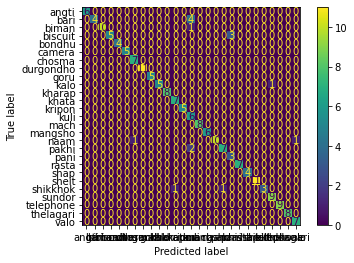

In [107]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# sns.heatmap(cm,annot=True)
labels = actions

# ax = sns.heatmap(cm, annot=True)
# ax.set_title("title")
# ax.xaxis.tick_top()
# ax.set_xticklabels(labels)
# ax.set_yticklabels(labels, rotation=0)

cm = confusion_matrix(ytrue, ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot().figure(figsize=(20,20))  
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.set_xticklabels(labels, rotation=45)

# plt.savefig("Confusion_Matrix.png")

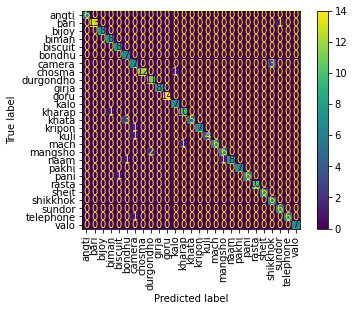

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# np.random.seed(0)
# y_true = np.random.randint(0,27, 100)
# y_pred = np.random.randint(0,27, 100)

labels = actions

cm = confusion_matrix(ytrue, ypred,)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(xticks_rotation = 'vertical')
#plt.savefig("Confusion_Matrix.png")

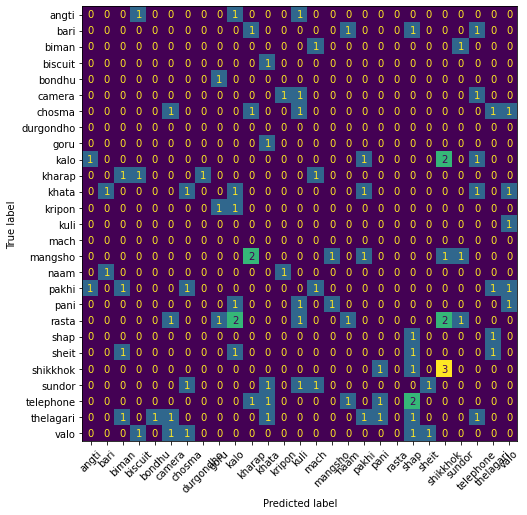

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# np.random.seed(0)

n = len(labels)
# y_true = np.random.randint(0,n, 100)
# y_pred = np.random.randint(0,n, 100)

# labels = [f'class_{i+1}' for i in range(n)]
labels = actions

fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(
            y_true, 
            y_pred, 
            display_labels = labels, 
            xticks_rotation=45,
            ax = ax, 
            colorbar = False)
